In [1]:
# installing new version of tensorflow -> 2.0 alpha

! pip install tensorflow==2.0.0-alpha0 

    100% |████████████████████████████████| 79.9MB 522kB/s 
    100% |████████████████████████████████| 419kB 24.4MB/s 
    100% |████████████████████████████████| 3.0MB 9.1MB/s 
    100% |████████████████████████████████| 61kB 15.8MB/s 
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [3]:
df_raw = pd.read_csv('../input/train.csv')

In [4]:
train_x = df_raw.drop(labels=['label'],axis=1)

train_y = df_raw['label']

In [5]:
train_x.shape

(42000, 784)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


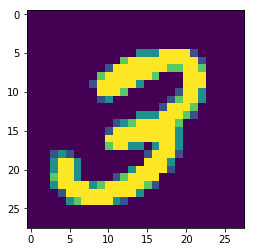

In [6]:
#converting from pd to np array and normalizing it

train_x = np.reshape(train_x.as_matrix(),newshape=(42000,28,28,1))

# visualizing the data
plt.imshow(np.reshape(train_x[2626],newshape=(28,28)))



In [7]:
#data augmentation

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)


In [8]:
#build the tf.keras.Sequential model by stacking layers. Choose an optimizer and loss function used for training:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')])


model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
#normalazing the data then training
train_x = np.divide(train_x,255.0)

model.fit_generator(datagen.flow(train_x,train_y,batch_size=256),epochs=40)

Epoch 1/40
165/165 [==============================] - 16s 100ms/step - loss: 0.7529 - accuracy: 0.7605
Epoch 2/40
165/165 [==============================] - 16s 96ms/step - loss: 0.3140 - accuracy: 0.9045
Epoch 3/40
165/165 [==============================] - 15s 93ms/step - loss: 0.2430 - accuracy: 0.9250
Epoch 4/40
165/165 [==============================] - 15s 92ms/step - loss: 0.2028 - accuracy: 0.9372
Epoch 5/40
165/165 [==============================] - 15s 91ms/step - loss: 0.1832 - accuracy: 0.9429
Epoch 6/40
165/165 [==============================] - 15s 90ms/step - loss: 0.1649 - accuracy: 0.9500
Epoch 7/40
165/165 [==============================] - 15s 93ms/step - loss: 0.1501 - accuracy: 0.9541
Epoch 8/40
165/165 [==============================] - 15s 93ms/step - loss: 0.1448 - accuracy: 0.9565
Epoch 9/40
165/165 [==============================] - 15s 90ms/step - loss: 0.1400 - accuracy: 0.9569
Epoch 10/40
165/165 [==============================] - 15s 90ms/step - loss: 0.13

In [10]:
#submition on test set

test_raw = pd.read_csv('../input/test.csv')

In [11]:
# test data preprocess

test = np.reshape(test_raw.as_matrix(),newshape=(28000,28,28,1))

test = np.divide(test,255.0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
predictions = model.predict(test)

In [13]:
predictions = np.argmax(predictions,axis=1)

In [14]:
submission = pd.DataFrame({'ImageId': np.arange(1,28001),
                       'Label': predictions})
submission.to_csv('submission.csv', index=False)